## MAE306 PSET 7

In [6]:
import numpy as np
import mat
import random

In [7]:
def f(x):
    f = np.pi*(x ** 2 * np.exp(2*x)*np.cos(np.pi*x/2))**2
    return f

## Trapezoidal method

In [285]:
x = 0
dx = 0.01
N = 1/dx

F = f(0)*dx/2

while x < 1-dx:
    F += f(x + dx)*dx
    x += dx

F += f(1)*dx/2
print(F)
print(N)

1.0058690853439205
100.0


## Simpson's rule

In [281]:
x = 0
dx = 0.003
N = 1/dx
k = 1
F = 0

while 2*k + 1 < N:
    F += f(x + (2*k-1)*dx) + 4*f(x + (2*k)*dx) + f(x + (2*k+1)*dx)
    k += 1

F_final = dx/3 * F
print(F_final)
print(N)


1.005869236161246
333.3333333333333


In [275]:
x = 0
N = 4
k = 1
F = f(0)*dx/2
F_desired = 1.00587
dx = 1/N
a = F - F_desired

while a > 0.001:
    while 2*k + 1 < N:
        F += dx/3 * f(x + (2*k-1)*dx) + 4*f(x + (2*k)*dx) + f(x + (2*k+1)*dx)
        k += 1
        i += 1
    F_final = dx/3 * F
    a = F_final - F_desired
    N += 1

print(F_final)
print(N)
print(dx)

1.0058692272653318
4
0.25


2514.8410625091055
1000.0


## Monte Carlo Method

In [286]:
random.random() #for generating random numbers

0.7037484667454734

In [287]:
N = 0
N_success = 0

while N < 10:
    x = random.random()
    y = 4*random.random()
    if y < f(x):
        N_success += 1
    N += 1
I = 4*(N_success/N)
print(I)
print(N)
print(N_success)

2.0
10
5


In [2]:
print((2.0 - 1.00587)/1.00587)
y1 = (2.0 - 1.00587)/1.00587
print(1/(10**0.5))

0.9883285116366926
0.31622776601683794


In [295]:
N = 0
N_success = 0

while N < 10**2:
    x = random.random()
    y = 4*random.random()
    if y < f(x):
        N_success += 1
    N += 1
I = 4*(N_success/N)
print(I)

1.04


In [8]:
print(np.abs((0.12 - 1.00587)/1.00587))
y2 = np.abs((0.12 - 1.00587)/1.00587)
print(1/(100**0.5))

0.8807002893017984
0.1


In [77]:
N = 0
N_success = 0

while N < 10**3:
    x = random.random()
    y = 4*random.random()
    if y < f(x):
        N_success += 1
    N += 1
I = 4*(N_success/N)
print(I)

1.08


In [9]:
print((1.08 - 1.00587)/1.00587)
y3 = (1.08 - 1.00587)/1.00587
print(1/(10**1.5))

0.07369739628381404
0.03162277660168379


In [78]:
N = 0
N_success = 0

while N < 10**4:
    x = random.random()
    y = 4*random.random()
    if y < f(x):
        N_success += 1
    N += 1
I = 4*(N_success/N)
print(I)

1.024


In [10]:
print((1.024 - 1.00587)/1.00587)
y4 = (1.024 - 1.00587)/1.00587
print(1/(10**2))

0.0180241979579866
0.01


In [79]:
N = 0
N_success = 0

while N < 10**5:
    x = random.random()
    y = 4*random.random()
    if y < f(x):
        N_success += 1
    N += 1
I = 4*(N_success/N)
print(I)

1.00932


In [11]:
print((1.00932 - 1.00587)/1.00587)
y5 = (1.00932 - 1.00587)/1.00587
print(1/(10**2.5))

0.003429866682573248
0.003162277660168379


In [24]:
N = 0
N_success = 0

while N < 10**6:
    x = random.random()
    y = 4*random.random()
    if y < f(x):
        N_success += 1
    N += 1
I = 4*(N_success/N)
print(I)

1.005532


In [25]:
print((1.005532 - 1.00587)/1.00587)
y6 = (1.005532 - 1.00587)/1.00587
print(1/(10**3))

-0.0003360275184665508
0.001


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


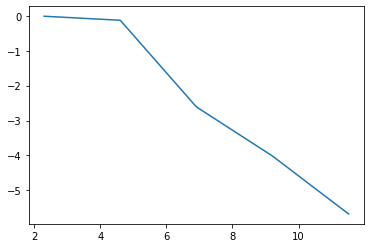

In [26]:
error = [y1,y2,y3,y4,y5,y6]
N = [10,10**2,10**3,10**4,10**5,10**6]
plt.plot(np.log(N),np.log(error))

# Gaussian Quadrature

In [301]:
w_i = [0.3607615730481386,0.3607615730481386,0.4679139345726910,0.4679139345726910,0.1713244923791704,0.1713244923791704]
x_i = [0.6612093864662645,-0.6612093864662645,-0.2386191860831969,0.2386191860831969,-0.9324695142031521,0.9324695142031521]

In [302]:
def f(x):
    f = (x**2.25)*np.exp(-2*x)
    return f

In [303]:
F = 0
i = 0
while i < 6:
    F += np.multiply(f(2*x_i[i]+2),2*w_i[i])
    i += 1

print(F)

0.26302607164546093


In [304]:
def g(x):
    g = 1/2 + (((1 - x**2)/(4*x))*np.log(np.abs((1 + x)/(1 - x))))
    return g

In [305]:
g(3)

0.03790187962670316

In [306]:
w_1 = [2]
x_1 = [0]

In [307]:
G = 0
i = 0
while i < 1:
    G += np.multiply(g(1.5*x_1[i]+1.5),(1.5*w_1[i]))
    i += 1
    
print(G)

0.4941013047286873


In [308]:
w_2 = [1.0000000000000000,1.0000000000000000]
x_2 = [-0.5773502691896257,0.5773502691896257]

In [309]:
G = 0
i = 0
while i < 2:
    G += g(1.5*x_2[i]+1.5)*(1.5*w_2[i])
    i += 1
    
print(G)

1.3720368520081112


In [310]:
w_3 = [0.8888888888888888,0.5555555555555556,0.5555555555555556]
x_3 = [0.0000000000000000,-0.7745966692414834,0.7745966692414834]

In [311]:
G = 0
i = 0
while i < 3:
    G += g((1.5*x_3[i])+1.5)*(1.5*w_3[i])
    i += 1
    
print(G)

1.0607976491752724


In [205]:
w_4 = [0.6521451548625461,0.6521451548625461,0.3478548451374538,0.3478548451374538]
x_4 = [-0.3399810435848563,0.3399810435848563,-0.8611363115940526,0.8611363115940526]

In [206]:
G = 0
i = 0
while i < 4:
    G += g(1.5*x_4[i]+1.5)*(1.5*w_4[i])
    i += 1
    
print(G)

1.13736214841826
